# Decision Tree and Random Forest Project 

**Situation:** For this project I explored a publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

I used lending data from 2007-2010 and tried to classify and predict whether or not the borrower paid back their loan in full [Dataset](https://www.lendingclub.com/info/download-data.action)

➞ <code style="color:blue">Decision tree algorithm is a machine learning algorithm that uses a decision tree to make predictions. It follows a tree-like model of decisions and their possible consequences. </code>

➞ <code style="color:blue">Random Forest combines the output of multiple decision trees to reach a single result, it adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features</code>

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get the Data

This data set contains the following features:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Exploratory Data Analysis

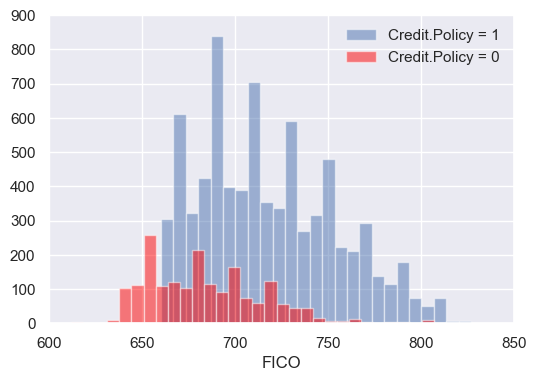

In [6]:
# Creating a histogram of two FICO distributions on top of each other, one for each credit.policy outcome
plt.figure(figsize=(6,4))
sns.set_theme()
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5, bins= 30, label = 'Credit.Policy = 1' )

loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5, bins= 30, color= 'red', label = 'Credit.Policy = 0')

plt.ylim(0,900)
plt.xlim(600,850)
plt.xlabel('FICO')
plt.legend(frameon=False)

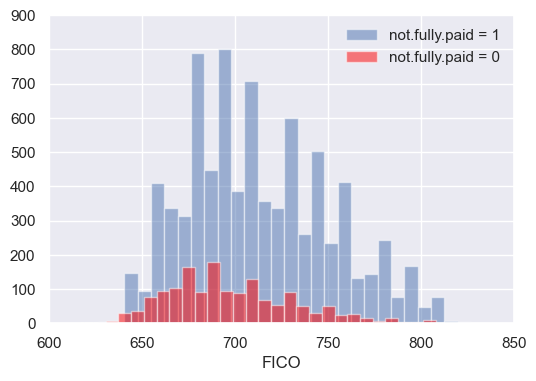

In [7]:
# Creating a similar figure, except this time select by the not.fully.paid column
plt.figure(figsize=(6,4))
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5, bins= 30, label = 'not.fully.paid = 1' )

loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5, bins= 30, color= 'red',label = 'not.fully.paid = 0')

plt.ylim(0,900)
plt.xlim(600,850)
plt.xlabel('FICO')
plt.legend(frameon=False)

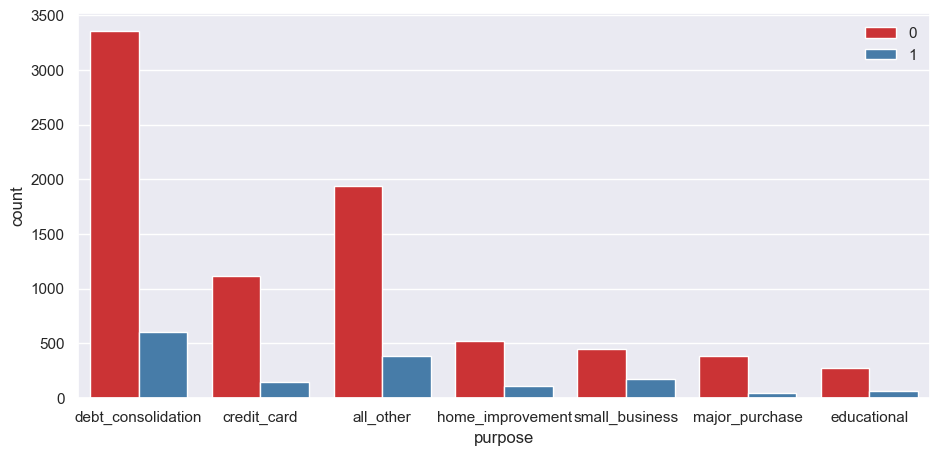

In [8]:
# Creating a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid
plt.figure(figsize=(11,5))
sns.countplot(x='purpose', data=loans, hue='not.fully.paid', palette='Set1')
plt.legend(frameon=False)

<Figure size 400x300 with 0 Axes>

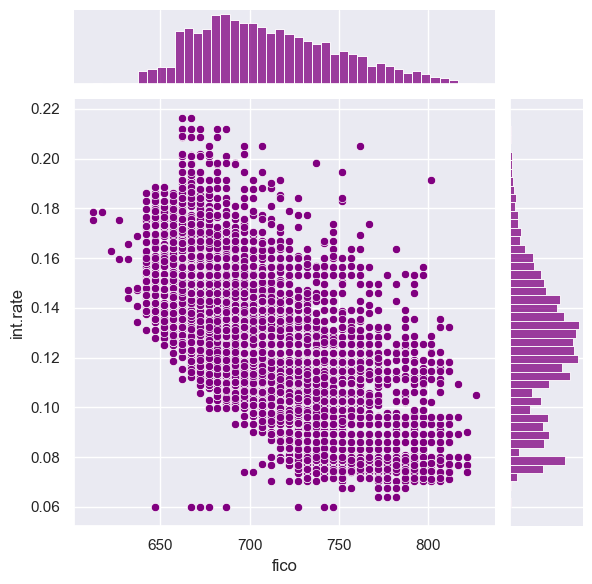

In [9]:
# Graph to see the trend between FICO score and interest rate
plt.figure(figsize=(4,3))
sns.jointplot(x=loans['fico'], y=loans['int.rate'], color='purple')

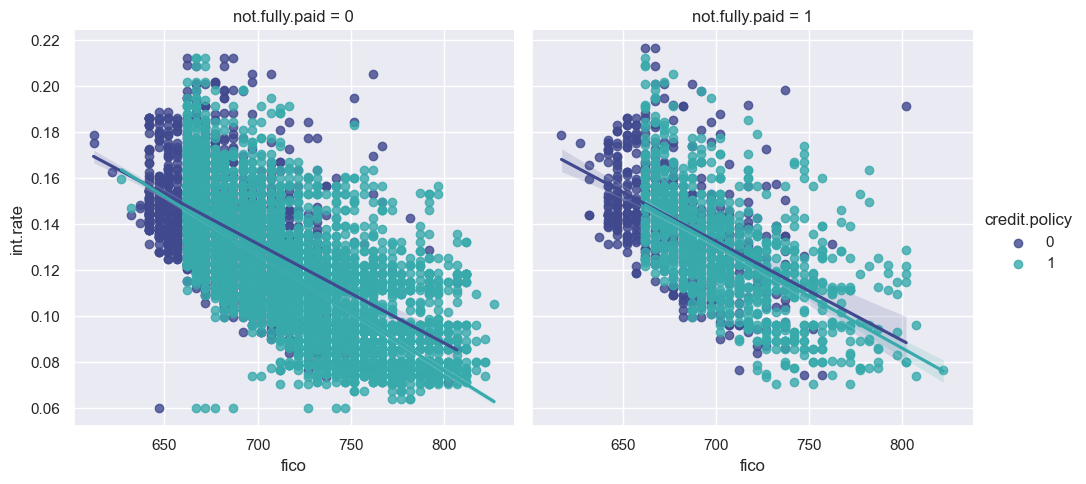

In [10]:
# Creating lmplots to see if the trend differed between not.fully.paid and credit.policy
sns.lmplot(x='fico', y='int.rate', data=loans, hue='credit.policy', col='not.fully.paid', palette='mako')

___
## Machine Learning Section - Decision Tree and Random Forest



### Setting up the Data

In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Categorical Features

The **purpose** column as categorical. So it was necessary transform them using dummy variables, done that the sklearn was able to understand them

In [12]:
cat_feats = ['purpose']
cat_feats

['purpose']

In [13]:
# Using pd.get_dummies to create a fixed larger dataframe that has new feature columns with dummy variables
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [14]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

### Training and Testing Data

I splited the data into training and testing sets for start to develop the machine learning model 

In [15]:
# Using model_selection.train_test_split from sklearn to split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('not.fully.paid', axis=1), final_data['not.fully.paid'], test_size=0.3, random_state=42)

___
### Training a Decision Tree Model

Start by training a single decision tree first

In [17]:
# Importing DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

In [18]:
# Create an instance of DecisionTreeClassifier() model named dtree
dtree = DecisionTreeClassifier()

In [19]:
# Train/fit lm on the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree

In [20]:
# Using dtree.predict() to predict off the X_test set of the data
pred = dtree.predict(X_test)

In [21]:
# Evaluating the model
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
print(confusion_matrix(y_test, pred))

[[2017  391]
 [ 361  105]]


In [23]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2408
           1       0.21      0.23      0.22       466

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.74      0.74      2874



___
### Training the Random Forest model

Training the random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier(n_estimators=350)

In [26]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=350)

### Predictions and Evaluation

In [27]:
predict = rfc.predict(X_test) 

In [28]:
print(confusion_matrix(y_test, predict))

[[2400    8]
 [ 457    9]]


In [29]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.53      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.68      0.51      0.47      2874
weighted avg       0.79      0.84      0.77      2874



### Conclusion

 

The Random Forest performed better than decision tree, it happens because by definition Random forest is a more strong modeling technique and much more robust than a decision tree. Many Decision trees are aggregated to limit overfitting as well as errors due to bias and achieve the final result.

Decision tree is a combination of decisions, and a random forest is a combination of many decision trees. Random forest is slow, but decision tree is fast and easy on large data, especially on regression tasks.

## Thanks!

**Nícolas de Souza**